In [19]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

# Connection string for Windows Authentication
connection_string = "mssql+pyodbc://@DESKTOP-I0463G8\\SQLEXPRESS/MovieStream?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"

# creating engine
engine = create_engine(connection_string)

query = 'SELECT * FROM Users'
df = pd.read_sql(query, engine)
df.head(10)

,UserId,UserName,Email,JoinDate,Country
0,1,John Doe,john@example.com,2022-01-15,USA
1,2,Jane Smith,jane@example.com,2021-11-20,UK
2,3,Carlos Perez,carlos@example.com,2022-06-05,Spain
3,4,Li Wei,liwei@example.com,2023-03-12,China
4,5,Amelie Dupont,amelie@example.com,2022-04-22,France
5,6,Sara Kim,sara@example.com,2023-01-08,South Korea
6,7,Mohammed Ali,mohammed@example.com,2021-09-17,UAE
7,8,Olga Ivanova,olga@example.com,2022-12-30,Russia
8,9,Lucas Muller,lucas@example.com,2021-08-14,Germany
9,10,Priya Patel,priya@example.com,2023-02-11,India


USER BEHAVIOUR ANALYSIS

In [26]:
query = '''
SELECT
u.UserName,
SUM(wh.WatchTime) AS TotalWatchTime,
COUNT(wh.MovieID) AS NumberofMoviesWatched
FROM
WatchHistory wh
JOIN
Users u ON u.UserID=wh.UserID
GROUP BY
u.UserName
ORDER BY
TotalWatchTime DESC
'''
df_totalWatchTime = pd.read_sql(query,engine)
df_totalWatchTime

,UserName,TotalWatchTime,NumberofMoviesWatched
0,Amelie Dupont,484,3
1,Mohammed Ali,449,3
2,John Doe,442,4
3,Li Wei,378,3
4,Lucas Muller,378,3
5,Jane Smith,374,3
6,Priya Patel,364,2
7,Sara Kim,332,3
8,Olga Ivanova,313,3
9,Carlos Perez,313,3


<Axes: title={'center': 'Total Time Watch Distribution'}, ylabel='Frequency'>

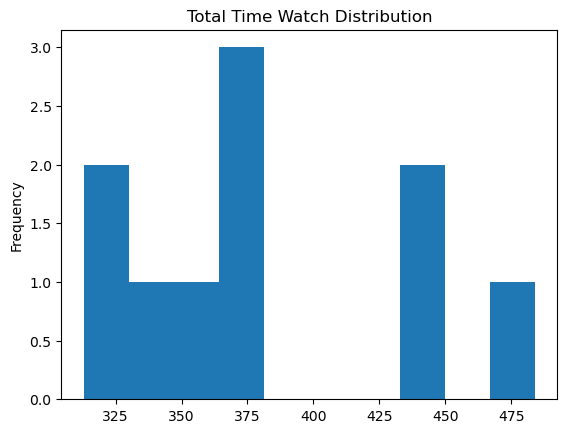

In [28]:
df_totalWatchTime['TotalWatchTime'].plot(kind='hist',bins=10,title='Total Time Watch Distribution')

MOVIE GENRE PREFERENCES

<Axes: title={'center': 'Genre Popularity'}, ylabel='AverageWatchTime'>

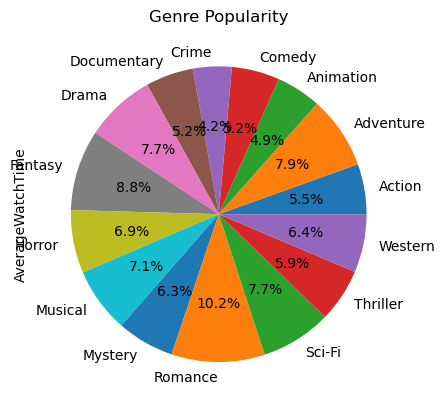

In [47]:
query = '''
SELECT 
g.GenreName,
COUNT(wh.MovieID) AS NumberOfViews,
AVG(wh.WatchTime) AS AverageWatchTime
FROM 
Movies m
JOIN 
WatchHistory wh ON m.MovieID = wh.MovieID
JOIN
Genres g ON g.GenreID = m.MovieID
GROUP BY 
g.GenreName
ORDER BY 
NumberOfViews DESC
'''
df_movie_preferences = pd.read_sql(query, engine)
df_movie_preferences
df_movie_preferences.set_index('GenreName')['AverageWatchTime'].plot(kind='pie', autopct='%1.1f%%', title='Genre Popularity')

TOP 5 MOVIE

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

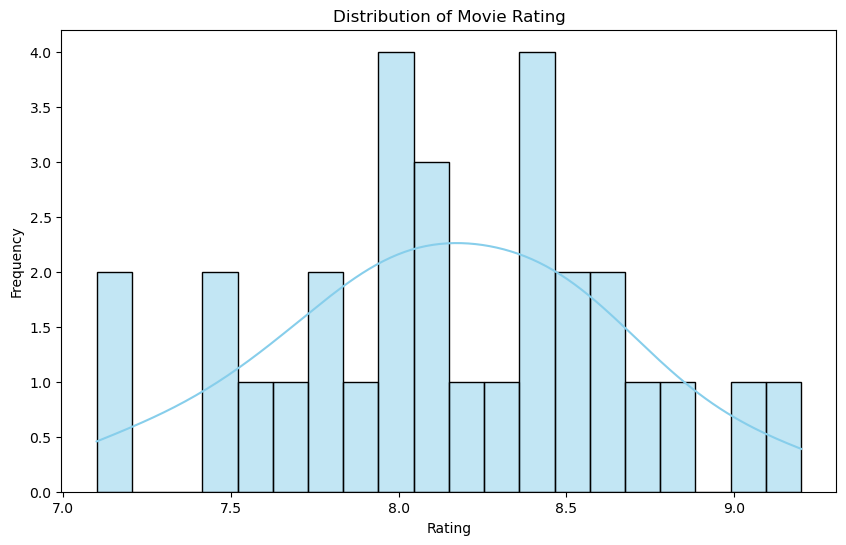

In [66]:
query = '''
SELECT
Title,
Rating
FROM 
Movies
ORDER BY 
Rating DESC
'''
df_top_movies = pd.read_sql(query, engine)
df_top_movies

plt.figure(figsize=(10,6))
sns.histplot(df_top_movies['Rating'],bins=20,kde=True, color='skyblue')
plt.title('Distribution of Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

USING NUMPY

In [73]:
query = '''
SELECT 
Rating
FROM 
Movies
'''
df_ratings = pd.read_sql(query, engine)

ratings_np = df_ratings['Rating'].to_numpy()

mean_ratings = np.mean(ratings_np)
median_ratings = np.median(ratings_np)
std_dev_rating = np.std(ratings_np)

print(f"Mean Rating: {mean_ratings}")
print(f"Median Rating: {median_ratings}")
print(f"Standard Deviation of Rating: {std_dev_rating}")

Mean Rating: 8.146666666666668
Median Rating: 8.1
Standard Deviation of Rating: 0.49107591628541053
